## Lab | Working with APIs

Following the class example, create a function that returns the price, names of origin and arrival airports and the name of the company. Do it for all the flights between two dates that cost the same.

We read the data for Interest Rates through an API, tranform it into JSON and examine the JSON file to understand its structure

In [19]:
import http.client
import json
import pandas as pd
from pandas import json_normalize

conn = http.client.HTTPSConnection("interest-rate-by-api-ninjas.p.rapidapi.com")

headers = {
    'X-RapidAPI-Key': "11f6f09b52msh75db053ef2b7803p1bbf98jsn62f82a92f265",
    'X-RapidAPI-Host': "interest-rate-by-api-ninjas.p.rapidapi.com"
}

conn.request("GET", "/v1/interestrate", headers=headers)

res = conn.getresponse()
data = res.read().decode("utf-8")

json_data = json.loads(data)

print(json_data)

{'central_bank_rates': [{'central_bank': 'American FED', 'country': 'United States', 'rate_pct': 5.25, 'last_updated': '05-03-2023'}, {'central_bank': 'Australian RBA', 'country': 'Australia', 'rate_pct': 4.1, 'last_updated': '06-06-2023'}, {'central_bank': 'Banco Central', 'country': 'Chile', 'rate_pct': 11.25, 'last_updated': '10-13-2022'}, {'central_bank': 'Bank of Korea', 'country': 'South Korea', 'rate_pct': 3.5, 'last_updated': '01-13-2023'}, {'central_bank': 'Brazilian BACEN', 'country': 'Brazil', 'rate_pct': 13.75, 'last_updated': '08-04-2022'}, {'central_bank': 'British BoE', 'country': 'Great Britain', 'rate_pct': 5.0, 'last_updated': '06-22-2023'}, {'central_bank': 'Canadian BOC', 'country': 'Canada', 'rate_pct': 4.75, 'last_updated': '06-07-2023'}, {'central_bank': 'Chinese PBC', 'country': 'China', 'rate_pct': 3.55, 'last_updated': '06-20-2023'}, {'central_bank': 'Czech CNB', 'country': 'Czech Republic', 'rate_pct': 7.0, 'last_updated': '06-22-2022'}, {'central_bank': 'Dan

We double check if the response from the API was successful

In [12]:
response.status_code

200

We read the JSON file into a Pandas dataframe, focusing on central bank rates

In [20]:
import pandas as pd

data = json_data['central_bank_rates']

df = pd.DataFrame(data)

In [21]:
df

,central_bank,country,rate_pct,last_updated
0,American FED,United States,5.25,05-03-2023
1,Australian RBA,Australia,4.10,06-06-2023
2,Banco Central,Chile,11.25,10-13-2022
3,Bank of Korea,South Korea,3.50,01-13-2023
4,Brazilian BACEN,Brazil,13.75,08-04-2022
5,British BoE,Great Britain,5.00,06-22-2023
6,Canadian BOC,Canada,4.75,06-07-2023
7,Chinese PBC,China,3.55,06-20-2023
8,Czech CNB,Czech Republic,7.00,06-22-2022
9,Danish Nationalbanken,Denmark,3.25,06-15-2023


We plot the interest rates by country (we used the viridis palette, which can be read by color blind people)

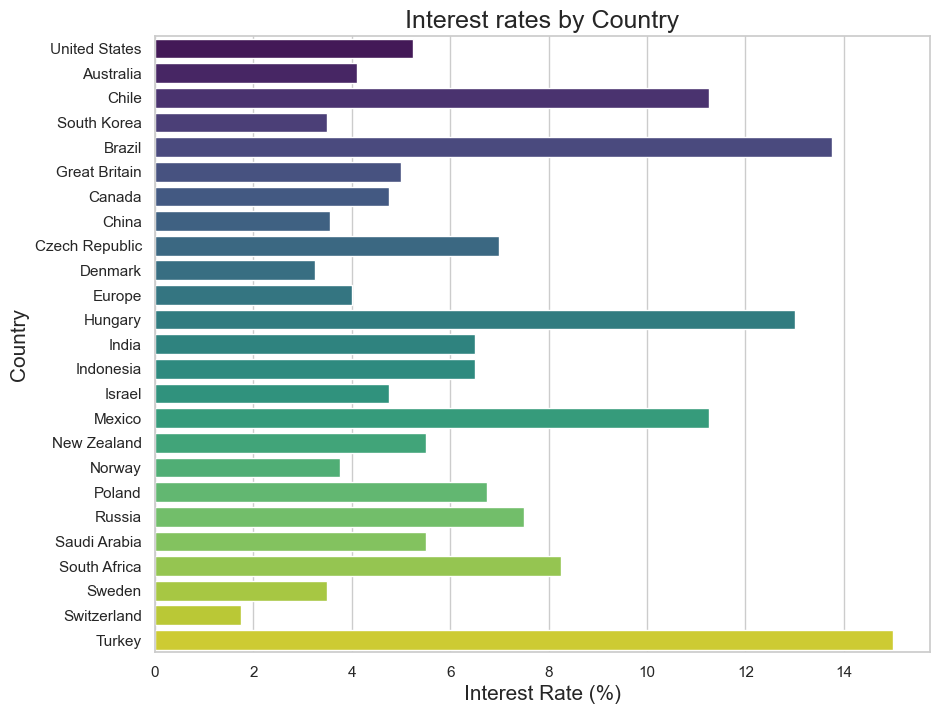

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
chart = sns.barplot(x='rate_pct', y='country', data=df, palette='viridis')
chart.set_xlabel("Interest Rate (%)", fontsize=15)
chart.set_ylabel("Country", fontsize=15)
chart.set_title("Interest rates by Country", fontsize=18)
plt.show()